# 单变量线性回归 Linear regression with one variable 
在本练习的这⼀部分中，您将使⽤变量实现线性回归，以预测餐⻋的利润。 
您可以通过已有的城市的利润和⼈⼝数据。帮助你选择下一个拓展业务的城市。

## 绘制数据 Plotting the Data 

使用**scatter plot**散点图可视化数据

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns  # 实现数据可视化
import matplotlib.pyplot as plt

In [2]:
path = "ex1data1.txt"
df = pd.read_csv(path,names=['population','profit'])    # 从文件中读取数据

In [3]:
df.head()   # 展示前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()   # 打印DataFrame的简要摘要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.describe()  # 用于生成描述性统计信息。 
# 描述性统计数据：数值类型的包括均值，标准差，最大值，最小值，分位数等；类别的包括个数，类别的数目，最高数量的类别及出现次数等；

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


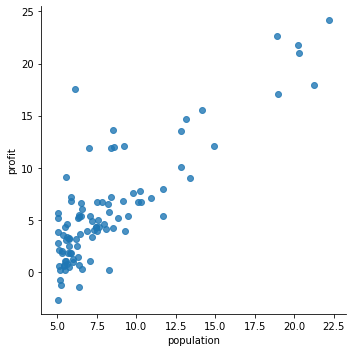

In [6]:
# 绘制散点图 sns.lmplot()
sns.lmplot(x='population',y='profit',data=df,fit_reg=False)
plt.show()

##  梯度下降 Gradient Descent 

使用梯度下降的方法将线性回归参数$\theta$拟合到我们的数据集中

代价函数：
$$J \left( \theta_0 \right) = \frac{1}{2m}\sum\limits_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right)^{2}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

${{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为上述公式。此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。

### 计算代价函数 Computing the cost $J(θ)$ 

In [7]:
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y),2)   # 注意遵循矩阵乘法法则X*theta.T
    return np.sum(inner) / (2 * len(X))

在训练集中第一列前面添加新的一列，使得特征矩阵满足以向量化的解决方法计算代建函数

In [8]:
df.insert(loc=0,column="first",value=1)

In [9]:
df.head()

,first,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


变量初始化 $X$训练集 $y$目标变量

- pandas数据选取相关方法：
```python
df[col]：根据列名，并以Series的形式返回列
df[[col1, col2]]：以DataFrame形式返回多列
s.iloc[0]：按位置选取数据
s.loc['index_one']：按索引选取数据
df.iloc[0,:]：返回第一行
df.iloc[0,0]：返回第一列的第一个元素
```

In [10]:
cols = df.shape[1]   # 查看行数和列数 shape[0]=rows,shape[1]=columns
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [11]:
X.head()

,first,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和y，然后才能使用它们

In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values)

我们还需要初始化theta,$\theta$ 是一个(1,2)矩阵

In [14]:
theta = np.matrix(np.array([0,0]))

In [15]:
theta

matrix([[0, 0]])

In [16]:
X.shape,y.shape,theta.shape    # 看下维度

((97, 2), (97, 1), (1, 2))

计算代价函数

In [17]:
computeCost(X, y, theta)

32.072733877455676

In [18]:
np.matrix(np.zeros(theta.shape)).shape

(1, 2)

### 批量梯度下降 Batch Gradient Descent 

$$
\large
\begin{array}{l}
\text { Repeat \{  } \\
\qquad \theta_{\mathrm{j}}:=\theta_{\mathrm{j}}-\alpha \frac{\partial}{\partial \theta_{j}} 
\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( h_{\theta} \left({x}^{\left( i \right)} \right)-{y}^{\left( i \right)} \right)}^{2}}}
\\
\text { \} }
\end{array}
$$

求导数后得到：当$n=1$时

$$
\large
\begin{array}{l}
\text { Repeat \{  } \\
\qquad 
{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}})}
\\
\qquad 
{{\theta }_{1}}:={{\theta }_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}})}x^{(i)} 
\\
\qquad(\text { simultaneous update } \theta_0,\theta_1)  \\
\text { \} }
\end{array}
$$

In [19]:
def gradientDescent(X,y,theta,alpha,iters):
    # numpy.zeros()   创建指定大小的数组，数组元素以 0 来填充  order: 可选参数，c代表与c语言类似，行优先；F代表列优先
    # numpy.ravel()   将多维数组降位一维(展平的数组元素)，顺序通常是"按行风格"
    temp = np.matrix(np.zeros(theta.shape))   # (1, 2)矩阵
    parameters = int(theta.ravel().shape[1])  #  parameters = 2  (θ0,θ1)
    cost = np.zeros(iters)   # cost 矩阵初始化
    
    for i in range(iters):           # 每循环一次，计算一次损失值，并赋值
        error = (X*theta.T) - y      # ※1  误差矩阵
        for j in range(parameters):  # 更新参数值
            inner = np.multiply(error, X[:,j])  # ※2 
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(inner))  # ※3 
        
        theta = temp  # 实现迭代
        cost[i] = computeCost(X,y,theta)
    return theta,cost


####  代码解释

- ※2 代码解释：
    1. ※1  error矩阵：$h_{\theta}(x^{(i)})-y^{(i)} = {{\theta }^{T}}X - y^{(i)}$
    2. X[ : , j ]为取X矩阵所有行，第j列的矩阵，用来表示对$θ_0$、$θ_1$的偏导公式。
    3. j取0时:$θ_0$  由于X矩阵元素全是1，所以term矩阵就等于error矩阵。
    4. j取1时:$θ_1$

In [20]:
X[:4,:]

matrix([[1.    , 6.1101],
        [1.    , 5.5277],
        [1.    , 8.5186],
        [1.    , 7.0032]])

In [21]:
error = (X*theta.T) - y
term = np.multiply(error, X[:,1])  

error[:4,:]

matrix([[-17.592 ],
        [ -9.1302],
        [-13.662 ],
        [-11.854 ]])

- ※3 代码解释：这段代码如下公式

$$
{{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{(inner)}
$$

#### 运行代码

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [22]:
alpha = 0.01
iters = 1000

运行梯度下降算法来将我们的参数θ适合于训练集。

In [23]:
BGD ,cost = gradientDescent(X,y,theta,alpha,iters)   
BGD

matrix([[-3.24140214,  1.1272942 ]])

利用拟合完成的参数计算训练模型的代价函数

In [24]:
computeCost(X=X,y=y,theta=BGD)

4.515955503078912

测试下训练模型 
1. 预测人口50，000的城市开店的利润
1. 预测人口150，000的城市开店的利润

In [25]:
predict_1 = [1,5] * BGD.T
print("预测人口50，000的城市开店的利润为：",predict_1[0,0])

预测人口50，000的城市开店的利润为： 2.3950688678664998


In [26]:
predict_2 = [1,15] * BGD.T
print("预测人口150，000的城市开店的利润为：",predict_2[0,0])

预测人口150，000的城市开店的利润为： 13.668010892148342


#### 拟合直线

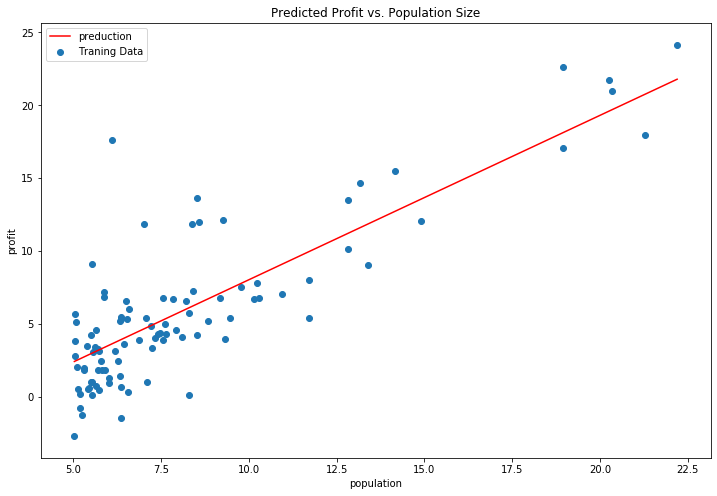

In [27]:
# np.linspace 在指定的间隔范围内返回均匀间隔的数字
x = np.linspace(df.population.min(),df.population.max(),100)  # 表示横坐标
f = BGD[0,0] * 1 + (BGD[0,1] * x) # 表示预测值

fig, ax = plt.subplots(figsize = (12,8))  # 图表大小
ax.plot(x,f,'r',label = "preduction")     # 设置拟合直线的xy数据，颜色，注释
ax.scatter(x=df.population, y=df.profit, label="Traning Data")

ax.legend(loc=2)  # 左上角注释
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')

plt.show()

绘制$J\left( \theta  \right) - N$曲线来观测算法在何时趋于收敛

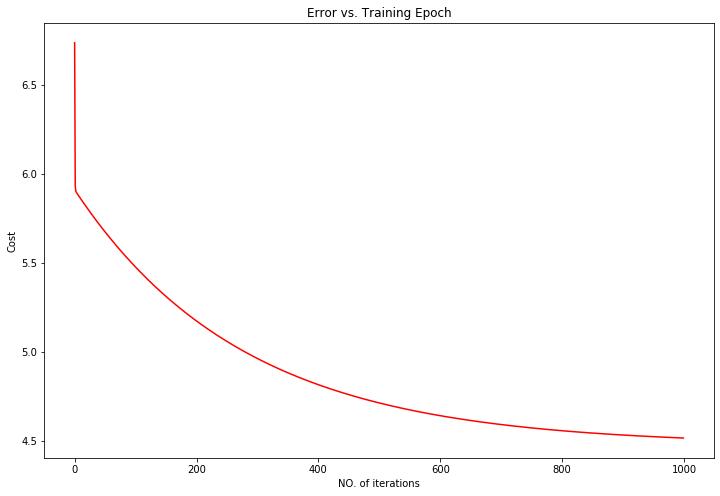

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')   # np.arange()函数返回一个有终点和起点的固定步长的排列

ax.set_xlabel('NO. of iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()


可以看出随着迭代次数的增加，代价函数值也越来越小最后收敛于一个值（实际上就是凸优化问题）

# 多变量线性回归Linear regression with one variable 
在这一部分中，您将使用多个变量实现线性回归，以预测房屋的价格。房屋价格数据集中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [29]:
path = 'ex1data2.txt'
df_2 = pd.read_csv(path,names=['Size', 'Bedrooms', 'Price'])

In [30]:
df_2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 特征归一化 Feature Normalization 

 在我们面对多维特征问题的时候，我们要保证这些特征都具有相近的尺度，这将帮助梯度下降算法更快地收敛。尝试将所有特征的尺度都尽量缩放到-1到1之间。

一般的解决方法：均值归一化**mean normalization**
$$
{{x}_{i}}=\frac{{{x}_{i}}-{{\mu}_{i}}}{S_n}
$$

In [31]:
# mean()函数求均值
# std()函数计算标准差
df_2 = (df_2 - df_2.mean()) / df_2.std() 
df_2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 批量梯度下降 Batch Gradient Descent 

与单变量线性回归的预处理类似，并且执行线性回归程序

In [32]:
# 1.添加新的一列
df_2.insert(0,"first",value=1)

In [33]:
df_2.head()

,first,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [34]:
# 2.初始化训练集X和目标变量y
cols_2 = df_2.shape[1]
X_2 = df_2.iloc[:,0:cols_2-1]
y_2 = df_2.iloc[:,cols_2-1:cols_2]

In [35]:
# 3.转化为numpy矩阵  初始化theta_2为(1,3)的矩阵
X_2 = np.matrix(X_2)
y_2 = np.matrix(y_2)

theta_2 = np.matrix([0,0,0])

In [36]:
# 4.查看相关参数的维度
X_2.shape,y_2.shape,theta_2.shape

((47, 3), (47, 1), (1, 3))

In [37]:
# 5.计算代价函数
computeCost(X=X_2,y=y_2,theta=theta_2)

0.48936170212765967

In [38]:
# 6.利用BGD最小化代价函数
alpha = 0.01
iters = 1000
BGD_2,cost_2 = gradientDescent(X_2,y_2,theta_2,alpha,iters)
BGD_2

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

In [39]:
# 7.利用拟合完成的参数计算训练模型的代价函数
computeCost(X=X_2,y=y_2,theta=BGD_2)

0.13070336960771892

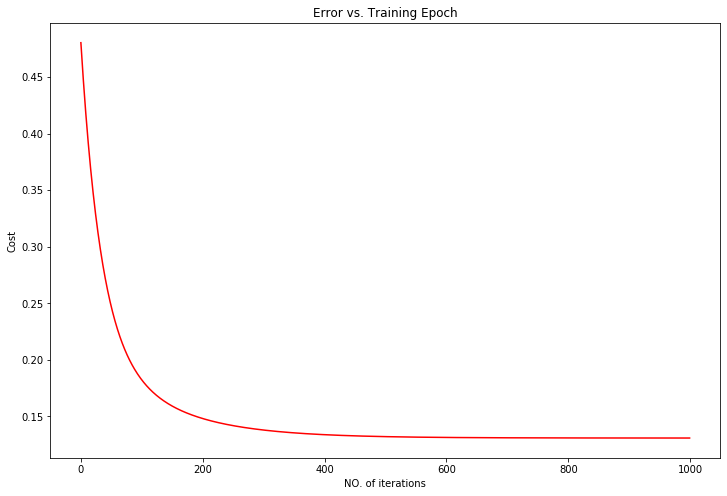

In [40]:
# 8.查看J(θ)-N曲线
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost_2, 'r')   # np.arange()函数返回一个有终点和起点的固定步长的排列

ax.set_xlabel('NO. of iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()

### 利用scikit-learn实现线性回归函数

In [41]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

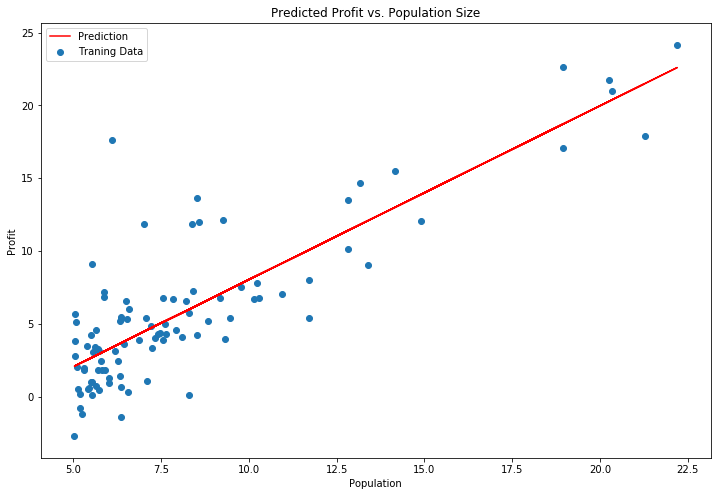

In [42]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')

ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

plt.show()

## 正规方程 Normal Equations 

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$$ 
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

- 梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

- 正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [43]:
def normalEquation(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [46]:
norEqn_theta  = normalEquation(X,y)
norEqn_theta.T

matrix([[-3.89578088,  1.19303364]])

In [45]:
BGD

matrix([[-3.24140214,  1.1272942 ]])